<a href="https://colab.research.google.com/github/WilliamMejiaG/Homework/blob/main/Bagged_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de precios de viviendas**
## Autor: William Mejia Galarza


1.   **Fecha de realización:** 2022-02-13
2.   **Fecha de actualización:** 2022-02-14
3. **Descripción**: Esta tarea de trata de usar bagging trees and random forest para predecir los precios de viviendas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor


In [74]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.4 MB/s 


In [75]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/TRACK_02_MACHINE_LEARNING/WEEK_02/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Feature matrix and target vector

In [41]:
X = df.loc[:,['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']].astype(float)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  float64
 3   sqft_lot       21613 non-null  float64
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  float64
 6   view           21613 non-null  float64
 7   condition      21613 non-null  float64
 8   grade          21613 non-null  float64
 9   sqft_above     21613 non-null  float64
 10  sqft_basement  21613 non-null  float64
 11  yr_built       21613 non-null  float64
 12  yr_renovated   21613 non-null  float64
 13  zipcode        21613 non-null  float64
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  float64
 17  sqft_lot15     21613 non-null  float64
dtypes: flo

In [44]:
X.shape

(21613, 18)

In [45]:
y = df.loc[:,'price'].values

In [65]:
y.shape

(21613,)

In [47]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

# Data base splitting

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)

In [49]:
X_train.shape

(16209, 18)

In [50]:
X_test.shape

(5404, 18)

In [51]:
y_train.shape

(16209,)

In [52]:
y_test.shape

(5404,)

# Random forest

In [53]:
# Model instance
clf = RandomForestRegressor(n_estimators = 10, bootstrap = True, oob_score= True)

In [54]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestRegressor(n_estimators=10, oob_score=True)

In [55]:
score = clf.score(X_test, y_test)

In [56]:
score

0.8691913946138097

In [66]:
clf.predict(X_test.iloc[0].values.reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([407746.875])

In [67]:
# List of values to try for n_estimators:
estimator_range = [1] + list(range(10, 50, 10))

In [68]:
scores = []
for estimator in estimator_range:
  clf = RandomForestRegressor(n_estimators = estimator, bootstrap = True, oob_score = True, random_state=1)
  clf.fit(X_train, y_train) 
  score = clf.score(X_test,y_test)
  scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


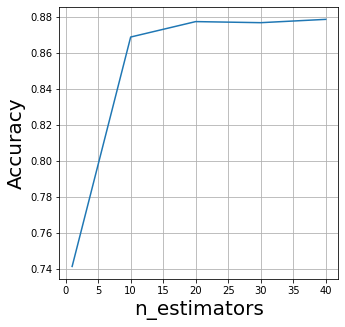

In [69]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
axes.plot(estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize =20)
axes.set_ylabel('Accuracy', fontsize = 20)
axes.grid()

# Features importance

In [77]:
my_model = RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train, y_train)
perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3814 ± 0.0190,lat
0.2393 ± 0.0075,sqft_living
0.1964 ± 0.0147,grade
0.1945 ± 0.0218,long
0.0281 ± 0.0039,yr_built
0.0278 ± 0.0080,waterfront
0.0275 ± 0.0029,sqft_living15
0.0146 ± 0.0005,sqft_above
0.0088 ± 0.0015,view
0.0086 ± 0.0013,zipcode


The more important features are lat, sqft_living, grade and long

# Bagging trees

In [86]:
# Model instance
bt = BaggingRegressor(n_estimators = 10, bootstrap = True, oob_score= True, random_state = 1)

In [87]:
bt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "


BaggingRegressor(oob_score=True, random_state=1)

In [88]:
bt.score(X_test, y_test)

0.8648835240145748

In [90]:
estimators_range = [1] + list(range(10,100,10))
scores = []
for estimator in estimators_range:
  bt = BaggingRegressor(n_estimators=estimator, bootstrap = True, oob_score= True, random_state = 1)
  bt.fit(X_train, y_train)
  score = bt.score(X_test, y_test)
  scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "


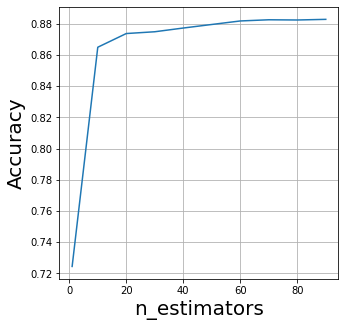

In [91]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
axes.plot(estimators_range, scores)
axes.set_xlabel('n_estimators', fontsize =20)
axes.set_ylabel('Accuracy', fontsize = 20)
axes.grid()

# Features importance bagging regresor

In [92]:
# Features importance
my_model = BaggingRegressor(n_estimators=80,random_state=0).fit(X_train, y_train)
perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3790 ± 0.0168,lat
0.2441 ± 0.0077,sqft_living
0.1970 ± 0.0222,long
0.1944 ± 0.0158,grade
0.0282 ± 0.0077,waterfront
0.0279 ± 0.0030,sqft_living15
0.0250 ± 0.0037,yr_built
0.0143 ± 0.0006,sqft_above
0.0088 ± 0.0017,view
0.0081 ± 0.0016,zipcode


The same features are highlighted by the bagging regressor. However, the unique difference is the order between long and grade.